<a href="https://colab.research.google.com/github/sjsjlee/menu_recommend_project/blob/main/%EB%A9%94%EB%89%B4%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/메뉴의사결정나무/점심메뉴 추천 서비스 구현을 위한 설문조사(응답).csv", encoding='CP949')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train.head()

,식사메뉴,식사타입,성별,직업상태,일행,식사목적,대기시간,식당선택기준,가격대,날씨,식당타입,식사가치관,만족여부
0,0,0,0,1,1,1,1,1,1,1,0,0,1
1,5,0,0,2,4,3,1,0,0,2,0,0,0
2,4,0,1,1,0,0,1,0,1,0,0,0,1
3,9,0,1,1,0,0,3,3,3,1,0,0,1
4,0,1,1,1,0,0,0,0,5,0,1,0,1


In [ ]:
feature_name = ['식사타입', '성별', '직업상태', '일행', '식사목적', '대기시간', '식당선택기준', '가격대', '날씨', '식당타입', '식사가치관']
x_train=train[feature_name]

label_name = '식사메뉴'
y_train=train[label_name]

x_train.head()
y_train.head()

0    0
1    5
2    4
3    9
4    0
Name: 식사메뉴, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
!pip install graphviz

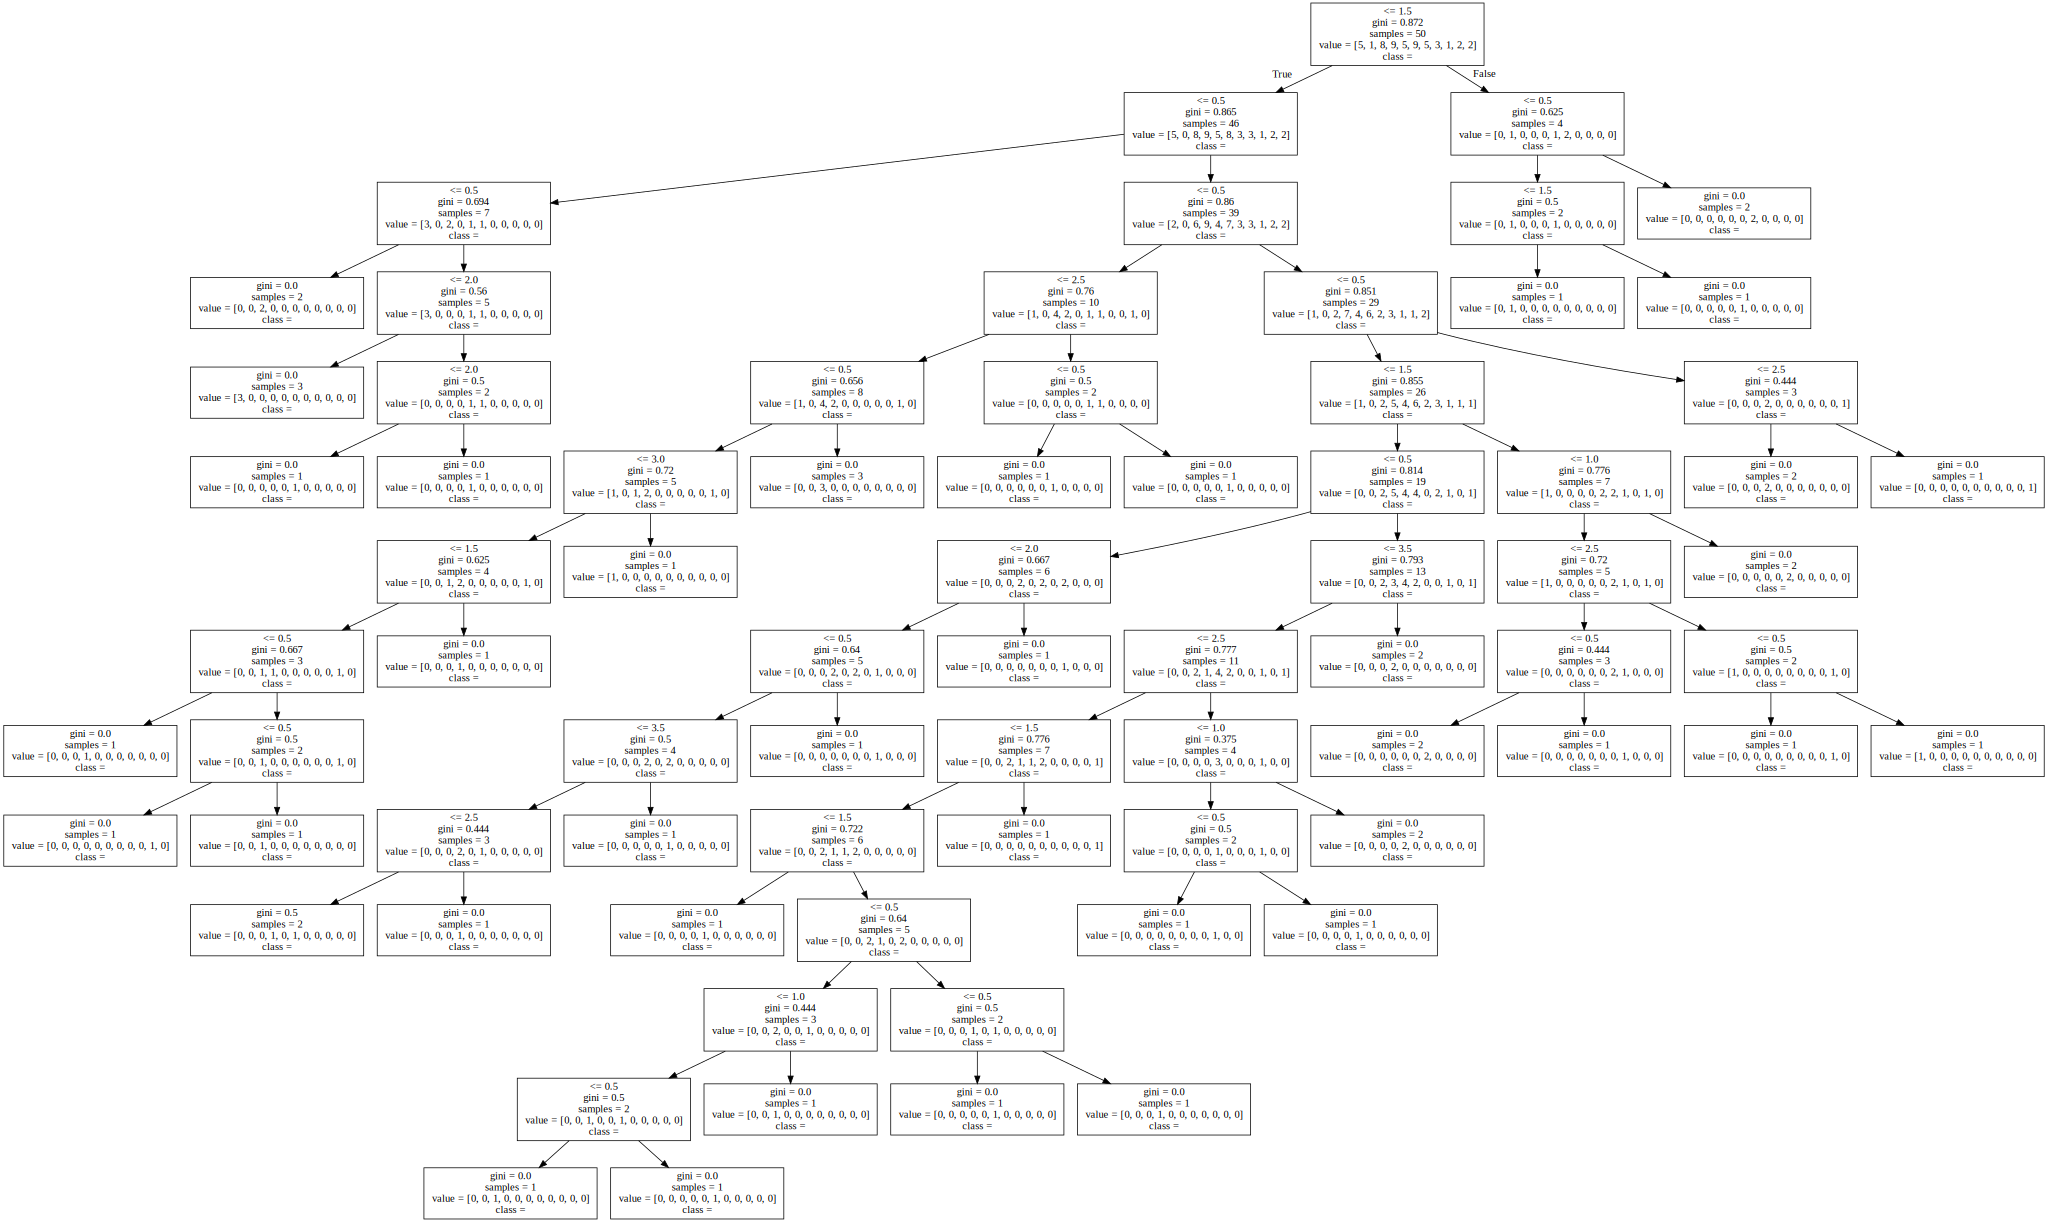

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model, feature_names= feature_name,
                       class_names = ['고기류', '한식', '일식', '중식', '분식', '패스트푸드',
                                     '양식', '국밥 및 찌개류', '국수', '찜탕', '카페', '동남아요리'])

graphviz.Source(tree)

In [ ]:
!pip install pydotplus

In [ ]:
import pydotplus

from sklearn.tree import export_graphviz

from IPython.core.display import Image

In [ ]:
from sklearn.tree import export_graphviz

# .dot 파일로 export 해줍니다
export_graphviz(model, out_file='tree.dot')

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메뉴의사결정나무/테스트데이터.csv', encoding='CP949')

In [ ]:
test.head()

,식사타입,성별,직업상태,일행,식사목적,대기시간,식당선택기준,가격대,날씨,식당타입,식사가치관
0,0,1,1,1,1,2,4,0,0,0,0
1,1,1,0,2,2,0,2,3,1,1,0
2,1,1,1,1,1,1,0,1,0,1,0
3,0,0,1,4,3,0,4,0,0,1,1
4,1,0,0,0,0,2,2,2,2,0,0


In [ ]:
x_test= test[feature_name]

model.predict(x_test)

array([3, 2, 3, 2, 0, 2])

In [ ]:
import sklearn.metrics as mt

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
test['예측메뉴'] = y_pred

In [ ]:
test.head()

,식사타입,성별,직업상태,일행,식사목적,대기시간,식당선택기준,가격대,날씨,식당타입,식사가치관,예측메뉴
0,0,1,1,1,1,2,4,0,0,0,0,3
1,1,1,0,2,2,0,2,3,1,1,0,2
2,1,1,1,1,1,1,0,1,0,1,0,3
3,0,0,1,4,3,0,4,0,0,1,1,2
4,1,0,0,0,0,2,2,2,2,0,0,0


In [ ]:
print('Train_Accuracy: ', model.score(x_train,y_train),'\n')

Train_Accuracy:  0.98 



In [ ]:
accuracy = mt.accuracy_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred, average='micro')


In [ ]:
accuracy

0.3333333333333333

In [ ]:
precision

0.3333333333333333

In [ ]:
# 로지스틱회귀모델

import statsmodels.api as sm

In [ ]:
X_train = train[['식사메뉴','식사타입', '성별', '직업상태', '일행', '식사목적', '대기시간', '식당선택기준', '가격대', '날씨', '식당타입', '식사가치관']]
Y_train = train[['만족여부']]

In [ ]:
X_train = sm.add_constant(X_train)
logit = sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.176005
         Iterations 10


In [ ]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                   만족여부   No. Observations:                   50
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                           12
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.6266
Time:                        05:13:48   Log-Likelihood:                -8.8002
converged:                       True   LL-Null:                       -23.570
Covariance Type:            nonrobust   LLR p-value:                  0.003275
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1268      4.819      1.271      0.204      -3.318      15.572
식사메뉴          -0.9809      0.630     -1.557      0.120      -2.216       0.254
식사타입           2.3101      3.634      0.636      0.5

In [ ]:
X_train = train[['식사메뉴', '식사목적', '대기시간', '식당선택기준', '날씨', '식당타입']]
Y_train = train[['만족여부']]

In [ ]:
X_train = sm.add_constant(X_train)
logit = sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.255801
         Iterations 8


In [ ]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                   만족여부   No. Observations:                   50
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.4574
Time:                        05:13:56   Log-Likelihood:                -12.790
converged:                       True   LL-Null:                       -23.570
Covariance Type:            nonrobust   LLR p-value:                  0.001455
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9825      2.523      2.767      0.006       2.037      11.928
식사메뉴          -0.4816      0.291     -1.654      0.098      -1.052       0.089
식사목적           0.3336      0.435      0.766      0.4

In [ ]:
X_train = train[['식사메뉴', '대기시간', '식당선택기준', '날씨', '식당타입']]
Y_train = train[['만족여부']]

In [ ]:
X_train = sm.add_constant(X_train)
logit = sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.262123
         Iterations 8


In [ ]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                   만족여부   No. Observations:                   50
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Sep 2021   Pseudo R-squ.:                  0.4439
Time:                        05:14:00   Log-Likelihood:                -13.106
converged:                       True   LL-Null:                       -23.570
Covariance Type:            nonrobust   LLR p-value:                 0.0008362
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9167      2.390      2.894      0.004       2.232      11.601
식사메뉴          -0.4311      0.256     -1.687      0.092      -0.932       0.070
대기시간          -0.9435      0.503     -1.877      0.0

In [ ]:
train['predict'] = logit.predict(X_train)

In [ ]:
train.head()

,식사메뉴,식사타입,성별,직업상태,일행,식사목적,대기시간,식당선택기준,가격대,날씨,식당타입,식사가치관,만족여부,predict
0,0,0,0,1,1,1,1,1,1,1,0,0,1,0.992684
1,5,0,0,2,4,3,1,0,0,2,0,0,0,0.381276
2,4,0,1,1,0,0,1,0,1,0,0,0,1,0.985922
3,9,0,1,1,0,0,3,3,3,1,0,0,1,0.789192
4,0,1,1,1,0,0,0,0,5,0,1,0,1,0.979521


In [ ]:
X_test = test[['예측메뉴', '대기시간', '식당선택기준', '날씨', '식당타입']]

X_test = sm.add_constant(X_test)

In [ ]:
print(X_test)

   const  예측메뉴  대기시간  식당선택기준  날씨  식당타입
0    1.0     3     2       4   0     0
1    1.0     2     0       2   1     1
2    1.0     3     1       0   0     1
3    1.0     2     0       4   0     1
4    1.0     0     2       2   2     0
5    1.0     2     3       3   0     1


In [ ]:
Y_pred=logit.predict(X_test)

In [ ]:
test['만족여부예측'] = Y_pred

In [ ]:
test.head()

,식사타입,성별,직업상태,일행,식사목적,대기시간,식당선택기준,가격대,날씨,식당타입,식사가치관,예측메뉴,만족여부예측
0,0,1,1,1,1,2,4,0,0,0,0,3,0.999693
1,1,1,0,2,2,0,2,3,1,1,0,2,0.953949
2,1,1,1,1,1,1,0,1,0,1,0,3,0.836295
3,0,0,1,4,3,0,4,0,0,1,1,2,0.999363
4,1,0,0,0,0,2,2,2,2,0,0,0,0.948043


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
print('roc_auc_score : {0:.3f}'.format(roc_auc_score(Y_test, Y_pred)))

roc_auc_score : 1.000
